In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.style.use('seaborn')
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.mode.chained_assignment = None # Warning for chained copies disabled

def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """function for make a graph"""
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold',         color='crimson',ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold',          color='blue',ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()


data = pd.read_csv("/home/apprenant/simplon_project/food_facts/data/foodfacts.tsv",delimiter='\t',encoding='utf-8', low_memory= False)

pd.options.mode.chained_assignment = None



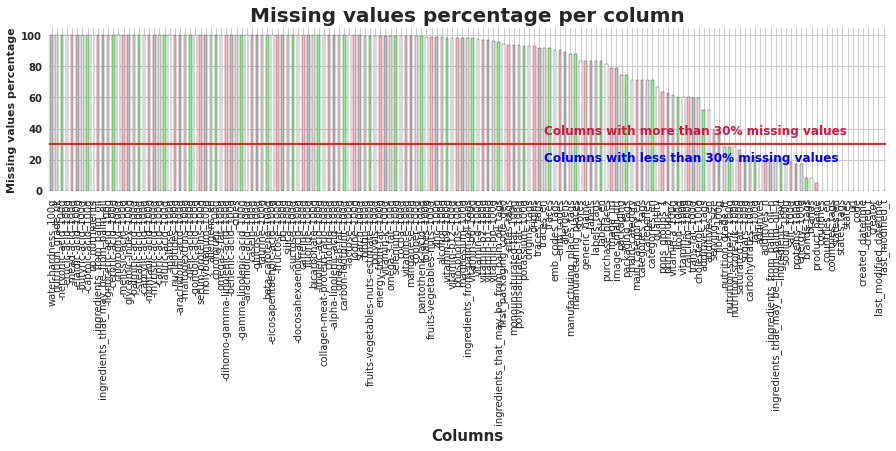

In [2]:
msv1(data,30, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

Ici on peut voir que le jeu de données est tres incomplet , une grande partie des colonnes sont entierement vides ou le taux de valeur manquante est élevé

on a travailler avec une partie des données , elle sont netoyés maintenant on va les visualisé

In [2]:
df = pd.read_csv("/home/apprenant/simplon_project/food_facts/data/df_clean.csv" ,low_memory= False, sep=',')

In [4]:
df.head()


,product_name,countries,ingredients_text,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,sodium_100g,carbohydrates_100g,saturated-fat_100g,nutriment_sum
0,Graines de Chia Bio,France,NaN,0.0,a,1734.0,30.1,0.5,41.0,16.4,0.01000,-2.0,0.003937,0.9,3.70,88.41000
1,Peanut Oil,US,Peanut oil.,0.0,e,3586.0,100.0,0.0,0.0,0.0,0.00000,NaN,0.000000,0.0,17.86,100.00000
2,Iodized Salt,US,"Salt, potassium iodide, dextrose, sodium bicar...",0.0,e,0.0,0.0,0.0,0.0,0.0,99.90582,NaN,39.333000,0.0,0.00,99.90582
3,Tuc Break Original format pocket,France,"Farine de _blé_ (81,6%), graisse de palme, suc...",1.0,e,1940.0,18.0,9.1,3.5,8.4,2.15000,20.0,0.846457,65.0,8.30,97.05000
4,Nougat Artisanal La Passion Des Abeilles,France,Fabriqué dans un atelier utilisant du gluten. ...,0.0,c,2050.0,22.9,12.4,0.0,9.9,0.10000,5.0,0.039370,61.0,2.20,93.90000


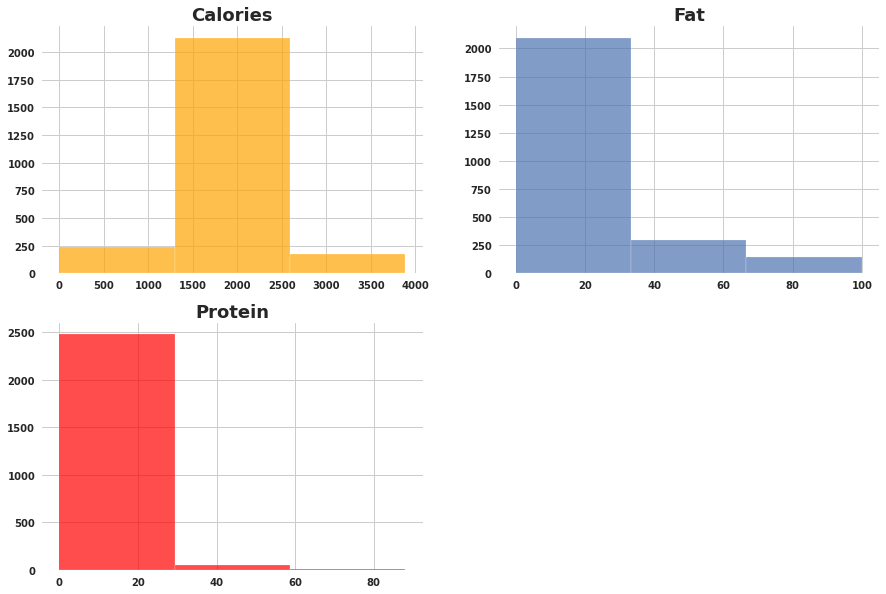

In [3]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

fig= plt.figure(figsize=(15,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.hist(df.energy_100g, bins=3, color='orange', alpha=0.7)
plt.title('Calories',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.hist(df.fat_100g, bins=3, alpha=0.7)
plt.title('Fat',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.hist(df.proteins_100g, bins=3, color='red', alpha=0.7)
plt.title('Protein',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()


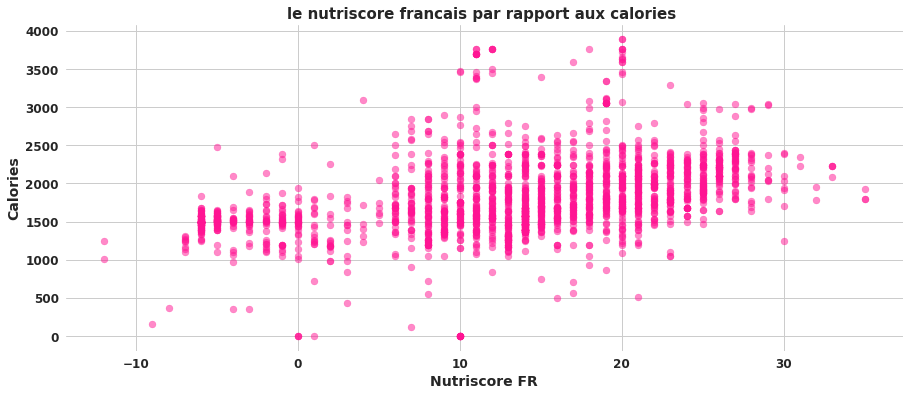

In [6]:
plt.figure(figsize=(15, 6))

plt.scatter(x=df['nutrition-score-fr_100g'], y=df['energy_100g'], color='deeppink', alpha=0.5)
plt.title("le nutriscore francais par rapport aux calories ", 
          weight='bold', 
          fontsize=15)
plt.xlabel('Nutriscore FR', weight='bold', fontsize=14)
plt.ylabel('Calories', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12,weight='bold')


plt.show()

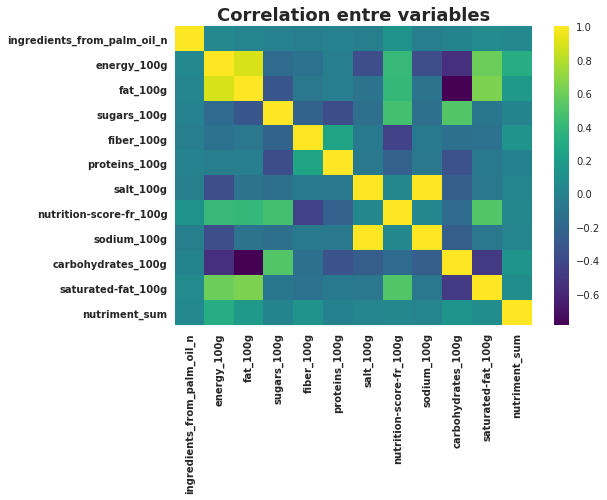

In [4]:


ab_corr=df.corr() # On compare l'ensemble des colonne entre elles pour vérifier le degré de corrélation
sns.heatmap(ab_corr, cmap='viridis')
plt.title("Correlation entre variables", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()



In [ ]:
columns_list = ['energy_100g','sugar_100g','sodium_100g', 'fat_100g', 'fiber_100g' , 'proteins_100g']
for column in df[columns_list] : 
    sns.boxplot(x = column , data = df[columns_list])

<AxesSubplot:xlabel='energy_100g'>

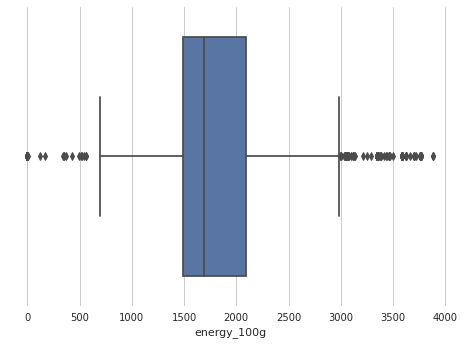

In [5]:
sns.boxplot(x = 'energy_100g', data = df)

<AxesSubplot:xlabel='sodium_100g'>

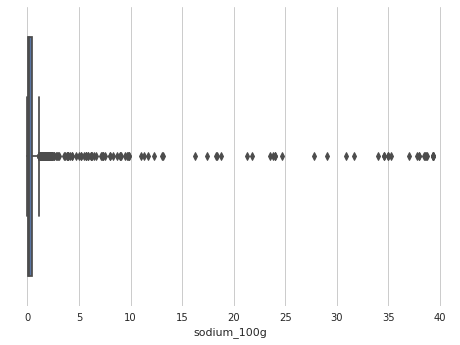

In [6]:
sns.boxplot(x = 'sodium_100g', data = df)

<AxesSubplot:xlabel='fat_100g'>

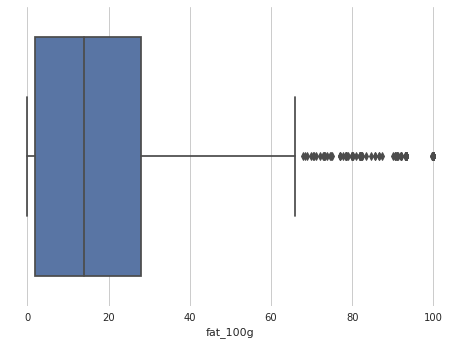

In [7]:
sns.boxplot(x = 'fat_100g', data = df)

<AxesSubplot:xlabel='fat_100g'>

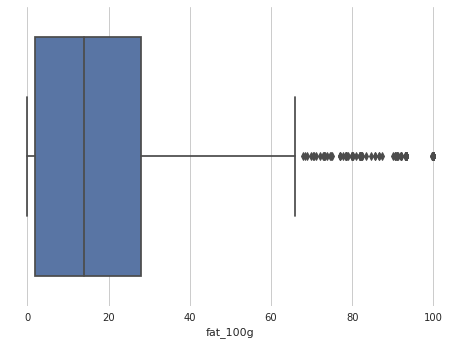

In [8]:
sns.boxplot(x = 'fiber_100g', data = df)

<AxesSubplot:xlabel='fat_100g'>

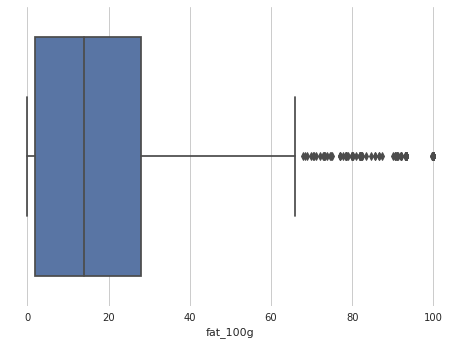

In [9]:
sns.boxplot(x = 'proteins_100g', data = df)